In [1]:
import pandas as pd
import numpy as np
import functions

In [2]:
#Solubility weighted index
weights = {'A': 0.8356471476582918,
 'C': 0.5208088354857734,
 'E': 0.9876987431418378,
 'D': 0.9079044671339564,
 'G': 0.7997168496420723,
 'F': 0.5849790194237692,
 'I': 0.6784124413866582,
 'H': 0.8947913996466419,
 'K': 0.9267104557513497,
 'M': 0.6296623675420369,
 'L': 0.6554221515081433,
 'N': 0.8597433107431216,
 'Q': 0.789434648348208,
 'P': 0.8235328714705341,
 'S': 0.7440908318492778,
 'R': 0.7712466317693457,
 'T': 0.8096922697856334,
 'W': 0.6374678690957594,
 'V': 0.7357837119163659,
 'Y': 0.6112801822947587}


#random seq
def random_seq(length=800, rand=123456):
    '''
    Generate random protein sequences of given length.
    '''
    rand_state = np.random.RandomState(rand)
    aa = [k for k, v in weights.items()]
    prot = 'M' + ''.join(rand_state.choice(aa, length-1))
    return prot



rand_df = []
for i in [x for x in range(50, 6050, 50)]:
    r = pd.DataFrame()
    r['Protein'] = [random_seq(length=i, rand=i+_) for _ in range(100)]
    r = r.explode('Protein').copy()
#     r['Protein'] = 'M' + r['Protein']
    rand_df.append(r)
rnd = pd.concat(rand_df)
rnd.reset_index(drop=True, inplace=True)
rnd.to_pickle('results/random_seq.pkl.gz')
rnd.head()

,Protein
0,MTANPCGIFIPFEHRGSDINWLMAIYERMDYYEQADELTSYAANHY...
1,MFAMFTMFSFGDILLICPHTKPFVNDHDEWDPKIPFFWCWDEDMCD...
2,MNPAFLNDDCDCFWTNTSLPRQHGHHHENSLACVFVIRAIWMWMLL...
3,MFTQMFVNDIMPDNISQTLVRTDQAFFAHMQPKKPCNNKSSVTEIC...
4,MRFERCAHWMIMGPTIDVCVNWHHQVHHKYSDFKYKCNPQPYQEEP...


In [3]:
#for random sequences

rnd['Random'] = rnd['Protein'].apply(lambda x:np.mean(functions.solubility_score(x, weights)))
rnd.shape

(12000, 2)

In [5]:
pET = pd.read_pickle('results/pET_all_analysis.pkl.gz')
pET['pET'] = pET['SWI']
pET.head()

pET_soluble = pET.loc[pET['Solubility'] == 1].copy()
pET_soluble = pET_soluble.rename(columns={'pET':'pET (Soluble)'})

pET_insoluble = pET.loc[pET['Solubility'] == 0].copy()
pET_insoluble = pET_insoluble.rename(columns={'pET':'pET (Insoluble)'})

In [6]:
ecoli = pd.read_pickle('results/ecoli_all_analysis.pkl.gz')
ecoli['eSOL'] = ecoli['SWI']

#https://www.pnas.org/content/106/11/4201
ecoli_soluble = ecoli.loc[ecoli['Solubility(%)'] >= 70].copy()
ecoli_soluble = ecoli_soluble.rename(columns={'eSOL':'eSOL (Soluble)'})

ecoli_insoluble = ecoli.loc[ecoli['Solubility(%)'] <= 30].copy()
ecoli_insoluble = ecoli_insoluble.rename(columns={'eSOL':'eSOL (Insoluble)'})


/Volumes/userdata/student_users/bikashkumarbhandari/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


[Text(0, 0.5, 'Density'), Text(0.5, 0, 'SWI')]

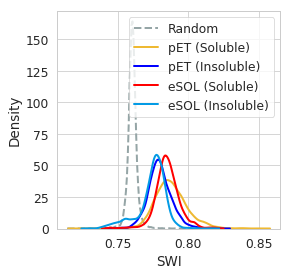

In [7]:
flatui = ["#d32f2f", "#7b1fa2", "#039be5", "#00897b", "#43a047", "#2ECC71",  "#3498db", "#95a5a6",  "#34495e"]


functions.plt.figure(figsize=(4, 4))


functions.sns.kdeplot(rnd['Random'], linestyle='dashed', color=flatui[7], lw=2)


functions.sns.kdeplot(pET_soluble['pET (Soluble)'], color='#EEB932', lw=2)
functions.sns.kdeplot(pET_insoluble['pET (Insoluble)'], color='#0000FF', lw=2)



functions.sns.kdeplot(ecoli_soluble['eSOL (Soluble)'], color='#FF0000', lw=2)
ax = functions.sns.kdeplot(ecoli_insoluble['eSOL (Insoluble)'], color=flatui[2], lw=2)
ax.set(ylabel='Density', xlabel='SWI')

# functions.plt.savefig('figs/random_ecoli_pET_comparision.pdf')